In [1]:
# Libraries

import os
import platform
import sys

In [2]:
# Ensure source path

ROOT = os.getcwd()

while not ROOT.endswith('upolanc-thesis') :
	ROOT = os.path.abspath(os.path.join(ROOT, os.pardir))

	if len(ROOT) < len('upolanc-thesis') :
		if   platform.system() == 'Linux' :
			ROOT = '/d/hpc/home/up4472/workspace/upolanc-thesis'
		elif platform.system() == 'Windows' :
			ROOT = 'C:\\Developer\\Workspace\\PyCharm\\Projects\\upolanc-thesis'
		else :
			raise ValueError()

		print(f'Warning : could not find correct directory, using default : {ROOT}')
		break

if ROOT not in sys.path :
	sys.path.append(ROOT)

os.chdir(ROOT)

In [3]:
# Code

from source.python.report import report_load
from source.python.report import report_concat
from source.python.report import report_plot
from source.python.io     import loader
from source.python        import runtime

runtime.set_numpy_format()
runtime.set_pandas_format()
runtime.set_plot_theme()

In [4]:
# List reports folder content

ROOT_DIR = os.path.join(ROOT, 'reports', 'default')

for path in os.listdir(ROOT_DIR) :
	if path.startswith('model-') or path.startswith('tune-') :
		print(os.path.join(ROOT_DIR, path))

# model      -MODE-MODEL-KMER-SEQUENCE-EPOCHS-TARGET     <- bert
# model      -MODE-MODEL-SEQUENCE-EPOCHS-TARGET          <- cnn
# tune-model -MODE-MODEL-SEQUENCE-TRIALS-EPOCHS-TARGET   <- tune cnn
# tune-data  -MODE-MODEL-SEQUENCE-TRIALS-EPOCHS-TARGET   <- tune data with cnn

C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\default\model-r-bertfc3-cat-6-promoter-0500-global-mean
C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\default\model-r-bertfc3-rnn-6-promoter-0500-global-mean
C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\default\model-r-washburn-gene-0500-global-mean
C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\default\model-r-washburn-gene-0500-tissue-mean
C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\default\model-r-washburn-gene-0500-tissue-mean-explode
C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\default\model-r-washburn-gene-0500-tissue-mean-seedling
C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\default\model-r-zrimec-gene-0500-global-mean
C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\default\model-r-zrimec-gene-0500-tissue-mean
C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\default\model-r-zrimec-gen

# 1. CNN

## 1.1 Model

In [5]:
# Load cnn model reports

report_cnn_model = report_load.load_cnn_reports(
	root = ROOT_DIR
)

### 1.1.1 Regression

In [6]:
# Display model performance for regression

report_cnn_model['regression']

,Type,Epochs,Target_0,Target_1,Target_2,Model,Optimizer,Learning_Rate,Momentum,Decay,Scheduler,Batch_Size,Dropout,Epoch,Valid_MSE,Eval_MSE,Eval_MAE,Eval_R2
0,gene,500,global,mean,None,washburn,adam,0.001815871,0.661281875,0.000395388,exponential,32,0.470,32,0.616498342,0.557999268,0.599265450,0.308064580
1,gene,500,tissue,mean,None,washburn,adam,0.001815871,0.661281875,0.000395388,exponential,32,0.470,23,0.656342707,0.655258795,0.652996713,0.268879235
2,gene,500,tissue,mean,seedling,washburn,adam,0.001815871,0.661281875,0.000395388,exponential,32,0.470,26,0.591230285,0.647375628,0.650652180,0.261054575
4,gene,500,global,mean,None,zrimec,adam,0.000855270,0.830793560,0.049112288,linear,64,0.090,43,0.615248383,0.648892189,0.655135765,0.250445098
6,gene,500,tissue,mean,seedling,zrimec,adam,0.000855270,0.830793560,0.049112288,linear,64,0.090,31,0.673128116,0.652908151,0.659634473,0.246836364
5,gene,500,tissue,mean,None,zrimec,adam,0.000855270,0.830793560,0.049112288,linear,64,0.090,59,0.686891409,0.705667055,0.685929240,0.233080164
3,gene,500,tissue,mean,explode,washburn,adam,0.001815871,0.661281875,0.000395388,exponential,32,0.470,11,0.658476066,0.709610886,0.696640393,0.215825811
7,gene,500,tissue,mean,explode,zrimec,adam,0.000855270,0.830793560,0.049112288,linear,64,0.090,21,0.692038413,0.705530821,0.678654226,0.215524673


### 1.1.2 Classification

In [7]:
# Display model performance for classification

report_cnn_model['classification']

,Type,Epochs,Target_0,Target_1,Target_2,Model,Optimizer,Learning_Rate,Momentum,Decay,Scheduler,Batch_Size,Dropout,Epoch,Valid_Entropy,Eval_Entropy,Eval_Accuracy,Eval_F1,Eval_AUROC


## 1.2 Tune Model

In [8]:
# Load tune model reports

report_tune_model = report_load.load_tune_model_reports(
	root = ROOT_DIR,
	show = False,
	n    = 5
)

C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\default\tune-model-r-zrimec-gene-1000-25-tissue-mean\report.csv
C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\default\tune-model-r-zrimec-gene-1000-25-global-mean\report.csv
C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\default\tune-model-r-zrimec-gene-0500-25-tissue-mean-explode\report.csv
C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\default\tune-model-r-washburn-gene-0500-25-tissue-mean\report.csv
C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\default\tune-model-r-washburn-gene-0500-25-global-mean\report.csv
C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\default\tune-model-r-washburn-gene-0250-25-tissue-mean-explode\report.csv


### 1.2.1 Regression

In [9]:
# Display overall regression prediction

R2_THRESHOLD = 0.00

for key, dataframe in report_tune_model['regression'].items() :
	nan_mse = dataframe['valid_loss'].isnull().values.ravel().sum()
	pos_r2  = dataframe[dataframe['valid_r2'] > R2_THRESHOLD]['valid_r2'].count()
	neg_r2  = dataframe[dataframe['valid_r2'] < R2_THRESHOLD]['valid_r2'].count()

	print('{:64s} : Size = {:4d} || NaN Loss = {:4d} || Pos R2 = {:4d} || Neg R2 = {:4d}'.format(key, len(dataframe), nan_mse, pos_r2, neg_r2))

tune-model-r-zrimec-gene-1000-25-tissue-mean                     : Size = 1000 || NaN Loss =  565 || Pos R2 =   86 || Neg R2 =  349
tune-model-r-zrimec-gene-1000-25-global-mean                     : Size = 1000 || NaN Loss =  243 || Pos R2 =  198 || Neg R2 =  559
tune-model-r-zrimec-gene-0500-25-tissue-mean-explode             : Size =  500 || NaN Loss =   44 || Pos R2 =  233 || Neg R2 =  223
tune-model-r-washburn-gene-0500-25-tissue-mean                   : Size =  500 || NaN Loss =    6 || Pos R2 =  306 || Neg R2 =  188
tune-model-r-washburn-gene-0500-25-global-mean                   : Size =  500 || NaN Loss =  235 || Pos R2 =  172 || Neg R2 =   93
tune-model-r-washburn-gene-0250-25-tissue-mean-explode           : Size =  250 || NaN Loss =   24 || Pos R2 =  170 || Neg R2 =   56


In [10]:
# Concat reports and display top few

report_concat.concat_tune_model_reports(
	reports = report_tune_model,
	mode    = 'regression',
	n       = 25
)

,Model,Sequence,Target0,Target1,Target2,ID,Valid_MSE,Valid_MAE,Valid_R2,Train_MSE,Epoch,Optimizer,Learning_Rate,Momentum,Decay,Scheduler,Batch_Size,Dropout
0,washburn,gene,tissue,mean,explode,c07e6432,0.635280578,0.639042504,0.319446060,0.621541332,25,adam,0.001025030,0.863352885,0.002270048,linear,64,0.423
1,washburn,gene,tissue,mean,explode,e3290128,0.621668590,0.636150431,0.315615270,0.591602998,25,adam,0.000267025,0.692889278,0.005743363,step,32,0.474
2,washburn,gene,tissue,mean,explode,78056277,0.640462652,0.646407102,0.313010570,0.599876152,25,adam,0.000526629,0.622410583,0.007077184,exponential,64,0.394
3,washburn,gene,tissue,mean,explode,9a7471c3,0.652823501,0.646436032,0.309993330,0.647246957,25,adam,0.000734194,0.929015752,0.000168554,plateau,128,0.426
4,washburn,gene,tissue,mean,explode,8039f99d,0.644801771,0.649618278,0.307750500,0.596913834,25,adam,0.000123382,0.944750722,0.007468796,plateau,64,0.326
5,washburn,gene,tissue,mean,explode,9a2bc047,0.646856915,0.650021511,0.305930530,0.567277230,25,adam,0.000217920,0.525867902,0.009510614,exponential,64,0.398
6,washburn,gene,tissue,mean,explode,0b5594a1,0.649560788,0.651824468,0.304297400,0.603778491,25,adam,0.000265706,0.571394436,0.009725213,exponential,64,0.471
7,washburn,gene,global,mean,None,e1e1c21d,0.568019972,0.607647874,0.298890920,0.562816817,25,adam,0.000462248,0.515364561,0.001384209,exponential,32,0.489
8,washburn,gene,tissue,mean,explode,3444ffaa,0.636669345,0.632291760,0.298259400,0.561920608,25,adam,0.000176379,0.635520648,0.006127512,step,32,0.451
9,washburn,gene,global,mean,None,c4f47f56,0.563137508,0.605040411,0.296825740,0.558655353,25,adam,0.001815871,0.661281875,0.000395388,exponential,32,0.470


### 1.2.2 Classification

In [11]:
# Concat reports and display top few

report_concat.concat_tune_model_reports(
	reports = report_tune_model,
	mode    = 'classification',
	n       = 25
)

## 2.3 Tune Data

In [12]:
# Display top few results for each tune configuration

report_tune_data = report_load.load_tune_data_reports(
	root = ROOT_DIR,
	show = False,
	n    = 25
)

C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\default\tune-data-r-zrimec-gene-1000-25-global-mean\report.csv
C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\default\tune-data-c-zrimec-gene-0100-25-global-mean\report.csv


### 2.3.1 Regression

In [13]:
# Concat reports and display top few

report_concat.concat_tune_data_reports(
	reports = report_tune_data,
	mode    = 'regression',
	n       = 25
)

,Model,Sequence,Target0,Target1,Target2,ID,Valid_MSE,Valid_MAE,Valid_R2,Train_MSE,Epoch,Lambda
0,zrimec,gene,global,mean,None,599af719,0.648150855,0.646805835,0.224130330,0.554547037,25,-0.145526611
1,zrimec,gene,global,mean,None,a5e2719e,0.226589170,0.387015893,0.215550740,0.221942309,25,-0.436219123
2,zrimec,gene,global,mean,None,53dbabfc,0.786596467,0.709209984,0.211554000,0.637495679,25,-0.105521385
3,zrimec,gene,global,mean,None,6dc72e0a,1.101029199,0.838361180,0.208666850,1.014267302,10,-0.034234074
4,zrimec,gene,global,mean,None,84f7b5c1,0.378160561,0.508789048,0.207865880,0.372209152,10,-0.289212403
5,zrimec,gene,global,mean,None,756fdc23,0.106111770,0.264295316,0.205602290,0.104107744,25,-0.710563702
6,zrimec,gene,global,mean,None,a38b2f7b,0.638232757,0.656157337,0.201600070,0.615477707,10,-0.158487631
7,zrimec,gene,global,mean,None,d937154c,0.092418812,0.249240113,0.195299630,0.091526112,25,-0.772120862
8,zrimec,gene,global,mean,None,ccb9118d,0.414475848,0.537225624,0.194477920,0.403514192,10,-0.268938321
9,zrimec,gene,global,mean,None,17870491,0.807163757,0.733480325,0.194213390,0.759723090,10,-0.105851402


### 2.3.1 Classification

In [14]:
# Concat reports and display top few

report_concat.concat_tune_data_reports(
	reports = report_tune_data,
	mode    = 'classification',
	n       = 25
)

,Model,Sequence,Target0,Target1,Target2,ID,Valid_Entropy,Valid_Accuracy,Valid_F1,Valid_AUROC,Train_Entropy,Epoch,Lambda,Bins
0,zrimec,gene,global,mean,None,3c1c8_00362,0.606888830,0.679687500,0.679687500,0.741642650,0.589920360,25,-0.949314172,2
1,zrimec,gene,global,mean,None,3c1c8_00209,0.618832112,0.670247400,0.670247400,0.730985400,0.602205647,25,-0.608011450,2
2,zrimec,gene,global,mean,None,3c1c8_00848,0.610589829,0.666666700,0.666666700,0.730442600,0.591348372,25,-0.886006831,2
3,zrimec,gene,global,mean,None,3c1c8_00650,0.607127348,0.666666700,0.666666700,0.735445100,0.588930837,25,-0.932004579,2
4,zrimec,gene,global,mean,None,3c1c8_00587,0.607963301,0.662109400,0.662109400,0.738654300,0.587737819,25,-0.935045952,2
5,zrimec,gene,global,mean,None,3c1c8_00002,0.620703657,0.662109400,0.662109400,0.725522500,0.593985201,25,-0.842029773,2
6,zrimec,gene,global,mean,None,3c1c8_00677,0.614036527,0.661783900,0.661783900,0.737053330,0.599304300,25,-0.677802409,2
7,zrimec,gene,global,mean,None,3c1c8_00578,0.621190745,0.661458300,0.661458300,0.731452640,0.599256917,25,-0.674633473,2
8,zrimec,gene,global,mean,None,3c1c8_00866,0.623119942,0.661132800,0.661132800,0.718320130,0.607549828,25,-0.556314941,2
9,zrimec,gene,global,mean,None,3c1c8_00497,0.628072930,0.659830750,0.659830750,0.728219800,0.601861044,25,-0.718206679,2


# 2. DNABert

## 2.1 Model

In [15]:
# Load bert model reports

report_bert_model = report_load.load_bert_reports(
	root = ROOT_DIR,
	show = False
)

C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\default\model-r-bertfc3-rnn-6-promoter-0500-global-mean
C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\default\model-r-bertfc3-cat-6-promoter-0500-global-mean


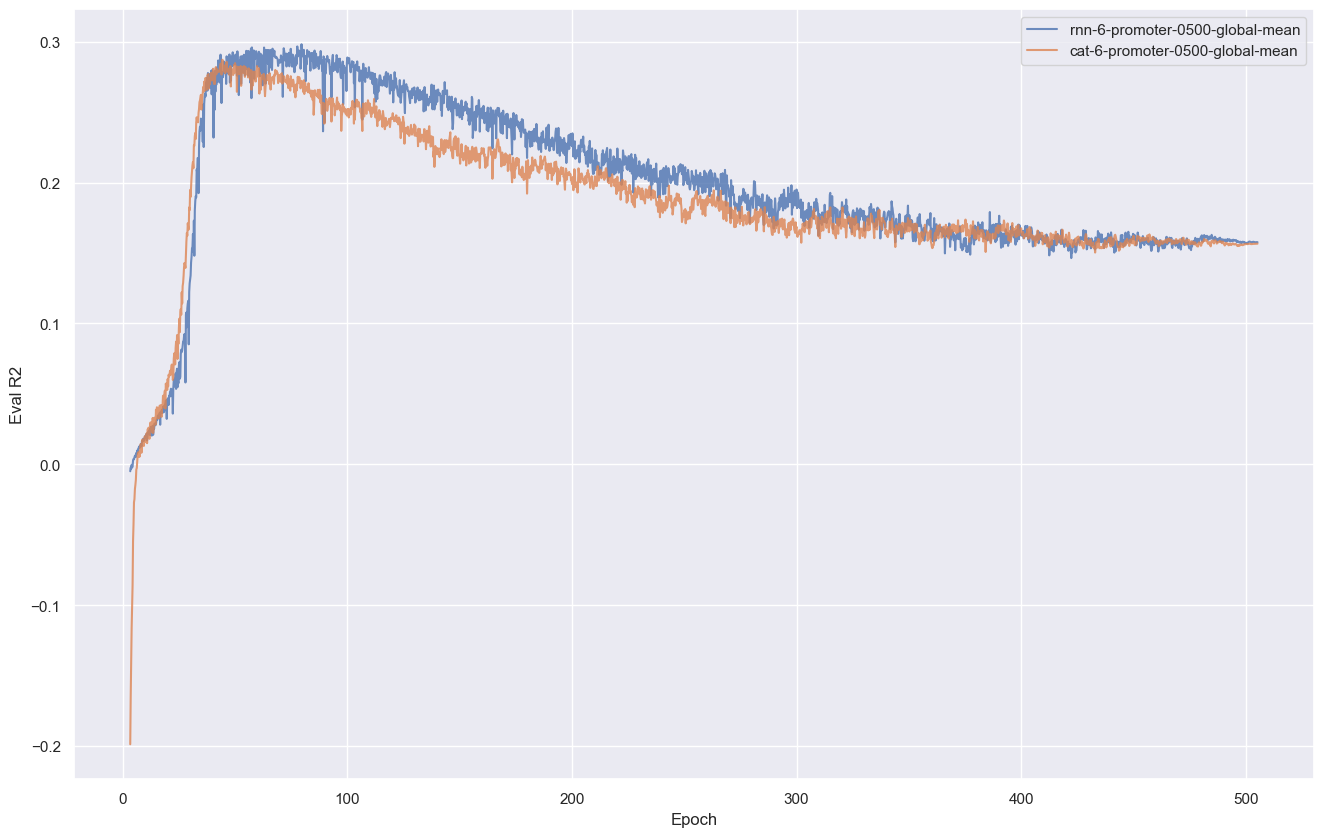

In [16]:
# Plot

report_plot.models_bert_r2(
	data     = report_bert_model,
	mode     = 'regression',
	x        = 15,
	y        = None,
	filename = None,
	step     = 'epoch'
)

In [17]:
# Concat reports and display top few

report_concat.concat_bert_best(
	data      = report_bert_model,
	mode      = 'regression',
	metric    = 'eval_r2',
	ascending = False
)

,Mode,Model,Kmer,Sequence,Epochs,Target0,Target1,Target2,Eval_R2,Eval_ME,Eval_MAPE,Eval_MAE,Learning_Rate,Step
0,r,bertfc3-rnn,6,promoter,500,global,mean,None,0.298152677,3.042543600,1.480103600,0.625761750,0.000046804,38200
1,r,bertfc3-cat,6,promoter,500,global,mean,None,0.287141812,3.063549300,1.539845700,0.631735500,0.000043918,21300
